<a href="https://colab.research.google.com/github/ArthurMarchiDS/Portfolio/blob/master/An%C3%A1lise_de_dados_da_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a violência no Rio de Janeiro

Não se pode negar que ao falar em violência, logo pensamos em cidades como Rio de Janeiro e associamos ao tráfico de drogas e lugares tomados por traficantes.

De fato, o problema da violência não é só do Rio de Janeiro, mas o país inteiro sofre essa calamidade.

Atualmente com o acesso à dados públicos cada vez mais facilitado, podemos realizar uma análise para entendermos melhor esse problema.

## Obtenção dos Dados

Os dados foram obtidos diretamente do portal [ISP Dados](http://www.ispdados.rj.gov.br/), que é um site oficial pertencente ao governo do Rio de Janeiro.

No caso do dataset a ser utilizado aqui, o arquivo csv pode ser baixado diretamente [aqui](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv).

### Importando os Dados.

Iremos importar as bibliotecas necessárias, tais como Pandas e Numpy e em seguida importaremos o nosso Dataset.

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

## Análise inicial dos dados

Iremos realizar uma análise inicial para entendermos melhor os dados que compõem nosso dataset.

Assim fica mais fácil de visualizar quais insights podemos extrair dele.

###Dimensão
Através do comando 'shape' vimos que nosso dataset é composto de 344 linhas e 56 colunas.

In [3]:
print('Quantidade de linhas:', df.shape[0] )
print('Quantidade de colunas', df.shape[1])

Quantidade de linhas: 344
Quantidade de colunas 56


### Colunas

Ao visualizarmos as colunas podemos ter uma idéia dos dados que estão contidos nela e começar a ter mais familiaridade com o dataset.

In [4]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### Tipos

Assim podemos ver por quais objetos nosso dataset é composto.

Podemos ver que os dados são compostos por Inteiro e Ponto flutuante.

In [5]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Prévia

Assim visualizando as primeiras 5 linhas, podemos ver como os dados estão distríbuidos.

In [6]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Valores Ausentes.

Vamos verificar qual a porcentagem de valores ausentes em nosso dataset.

In [7]:
df.isnull().sum().sort_values() /df.shape[0] 

vano                          0.000000
indicador_roubo_veic          0.000000
indicador_roubo_rua           0.000000
indicador_letalidade          0.000000
encontro_cadaver              0.000000
recuperacao_veiculos          0.000000
apreensao_drogas              0.000000
total_furtos                  0.000000
outros_furtos                 0.000000
furto_transeunte              0.000000
furto_veiculos                0.000000
total_roubos                  0.000000
outros_roubos                 0.000000
roubo_banco                   0.000000
roubo_em_coletivo             0.000000
fase                          0.000000
roubo_carga                   0.000000
roubo_veiculo                 0.000000
mes                           0.000000
roubo_transeunte              0.000000
hom_doloso                    0.000000
lesao_corp_dolosa             0.000000
latrocinio                    0.000000
roubo_residencia              0.000000
roubo_comercio                0.000000
tentat_hom               

## Informações estatísticas da violência no Rio de Janeiro

In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [9]:
df.roubo_veiculo.mean() #Média da coluna 'roubo_veiculo'

2448.6976744186045

In [10]:
df.furto_veiculos.mean() # Média da coluna 'furto_veiculos'

1674.671511627907

In [11]:
df.recuperacao_veiculos.mean() # Média da coluna 'recuperacao_veiculos'

1772.2383720930231

In [13]:
#Porcentagem de veículos recuperados em relação aos roubos e furtos de veículos.
df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean()) *100

42.980346705075085

In [18]:
print('Valor máximo na coluna correspondente ao homicídio doloso:',df.hom_doloso.max())
print('Valor mínimo na coluna correspondente ao homicídio doloso:',df.hom_doloso.min())



Valor máximo na coluna correspondente ao homicídio doloso: 831
Valor mínimo na coluna correspondente ao homicídio doloso: 272


## Visualização dos dados

Para entender melhor a distribuição do dataset, irei gerar um histograma.

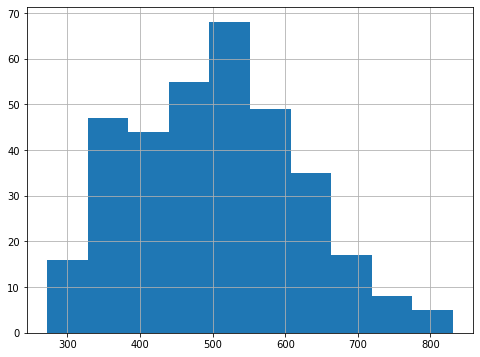

In [53]:
df.hom_doloso.hist(figsize=(8,6));

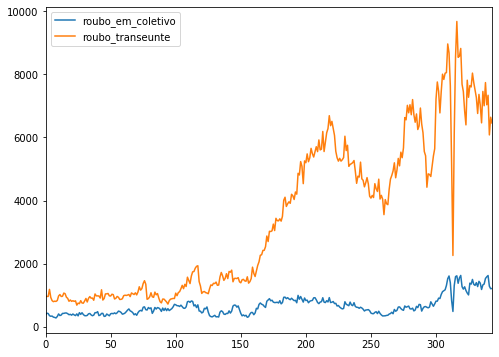

In [110]:
#Comparativo entre duas colunas 'roubo_em_coletivo' e 'roubo_transeunte'
df.roubo_em_coletivo.plot(legend = True, figsize=(8,6));
df.roubo_transeunte.plot(legend=True);

## Conclusão

Quando se trata se dados reais, extraídos de sites do governo ou outros sites e portais com dados abertos tem que tomar muito cuidado para não gerar análises equivocadas, ou até mesmo não se frustrar, pois datasets com dados reais são completamente diferentes de datasets usados para competições,onde as informações estão limpas e com o dataset pronto para análise.

O objetivo dessa análise foi realizar uma análise exploratória dos dados, desde a extração, limpeza e visualização dos dados que compõem o nosso dataset.

E demonstrar a importância de ter a disposição uma base de dados sólida para gerar análises e insights de diversas formas.

